In [4]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [5]:
df_county1=pd.read_csv('dataset\silage_corn_county.csv')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

In [6]:
df_county2 = df_county1[['Province','County','Region','Region_NW1SW2NE3','growth_days','irrig_count'
                         ,'irrig_wat_m3ha','Ecwat','soil_texture_heavy0normallight1'
                         , 'ETo_mm','elevation_m', 'latitude','longitude','yield_tonha' ]].copy()
display(df_county2)

x5_region=df_county1[['Region_NW1SW2NE3']].to_numpy().ravel()
x21_volirrig=df_county1[['irrig_wat_m3ha']].to_numpy().ravel()

,Province,County,Region,Region_NW1SW2NE3,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,soil_texture_heavy0normallight1,ETo_mm,elevation_m,latitude,longitude,yield_tonha
0,Alborz,Karaj,NW,1,97.3,8.8,8754.5,0.4,0.8,580.0,1372.9,35.802776,50.947926,49.5
1,Alborz,Hashtgerd,NW,1,97.0,14.5,6867.5,0.3,1.0,554.5,1612.9,35.951485,50.668327,55.0
2,Tehran,EslamShahr,NW,1,96.2,9.0,6825.6,0.8,0.3,639.2,1162.9,35.551202,51.230455,51.9
3,Tehran,Pakdasht,NW,1,100.7,8.0,5922.9,0.8,0.0,651.8,987.3,35.415008,51.731349,55.0
4,Tehran,Shahrerey,NW,1,84.5,6.0,6134.0,1.7,0.0,592.9,1012.3,35.577045,51.462464,56.9
5,Gazvin,Abyek,NW,1,102.4,8.8,8692.6,2.7,0.4,581.8,1279.1,36.040428,50.544616,50.4
6,Gazvin,BoyeenZahra,NW,1,109.6,9.4,7308.8,3.1,0.0,763.3,1282.0,35.765430,50.052859,47.8
7,Ardabil,Moghan,NW,1,83.8,4.7,5868.3,1.1,0.0,421.7,96.6,39.511879,47.945006,32.8
8,Esfahan,Shahinshar,SW,2,103.3,18.0,8000.8,2.4,0.6,732.5,1715.3,32.860873,51.553297,58.2
9,Fars,Sepidan,SW,2,94.8,16.0,9088.5,2.3,0.5,587.8,1600.0,30.256021,51.975202,59.8


In [7]:
df_zone1=df_county2.groupby('Region').mean()
display(df_zone1)

,Region_NW1SW2NE3,growth_days,irrig_count,irrig_wat_m3ha,Ecwat,soil_texture_heavy0normallight1,ETo_mm,elevation_m,latitude,longitude,yield_tonha
Region,,,,,,,,,,,
NE,3.0,92.433333,16.633333,9695.366667,1.2000,0.9000,782.633333,1015.70,36.197122,59.052779,76.066667
NW,1.0,96.437500,8.650000,7046.775000,1.3625,0.3125,598.150000,1100.75,36.201907,50.572875,49.912500
SW,2.0,99.260000,16.200000,8068.380000,1.7600,0.5000,602.220000,1063.96,31.195556,50.994579,55.680000


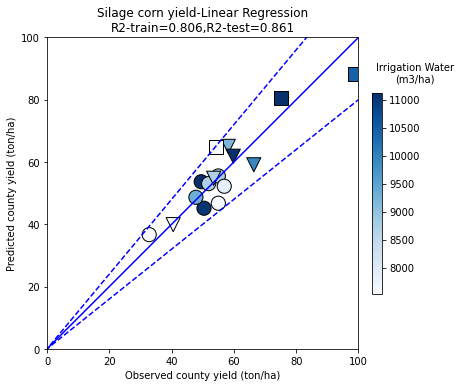

In [8]:
x = df_county2[['growth_days','irrig_count','irrig_wat_m3ha','Ecwat','ETo_mm','elevation_m']].to_numpy()
#x = df_county2[['latitude','longitude']].to_numpy()
#x = df_county2[['growth_days','irrig_wat_m3ha','ETo_mm']].to_numpy()
#x = df_county2[['irrig_wat_m3ha','ETo_mm']].to_numpy()
#x = df_county2[['irrig_wat_m3ha','ETo_mm']].to_numpy()
y = df_county2[["yield_tonha"]].to_numpy().ravel()
N=16
ind=np.random.choice(N,N)<N*0.7

xmin=np.min(x,axis=0)
xmax=np.max(x,axis=0)
ymin=np.min(y)
ymax=np.max(y)
X=(x-xmin)/(xmax-xmin)
Y=(y-ymin)/(ymax-ymin)

regressor_lin1 = LinearRegression()
#regressor_lin1=DecisionTreeRegressor(max_depth=5,min_samples_leaf=4)
#regressor_lin1 = MLPRegressor(hidden_layer_sizes=5,max_iter=500000, activation='tanh')
regressor_lin1.fit(X,Y)
#regressor_lin1.fit(X,X)
Y_hat_lin1 = regressor_lin1.predict(X)

y_hat_lin1=Y_hat_lin1*(ymax-ymin)+ymin

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='SouthWest',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water\n(m3/ha)', rotation=0,labelpad=-5, y=1.15,)
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=100)
ax.set_ylim(bottom=0,top=100)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Silage corn yield-Linear Regression\nR2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\silage_corn_county_yield_linear_regression.png', dpi=300)


[ 1.358  2.956 -0.797]


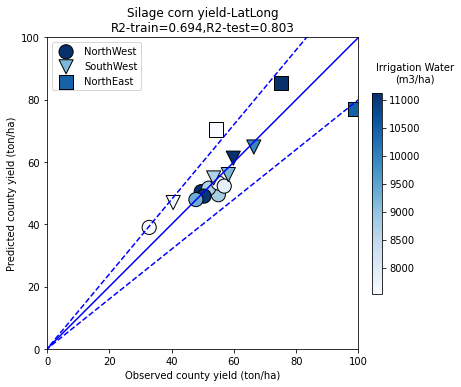

In [9]:
N=16
ind=np.random.choice(N,N)<N*0.7

x0=np.ones((N,1)).ravel()
x1_long = df_county2[['longitude']].to_numpy().ravel()
x2_lat = df_county2[['latitude']].to_numpy().ravel()
x=np.c_[x0,x1_long,x2_lat]
y = df_county2[["yield_tonha"]].to_numpy().ravel()
a0 = [1.358, 2.963, -0.734]

def func1(a,x): 
    x1_long=x[:,1]
    x2_lat=x[:,2]
    return 60*a[0]*(x1_long/60)**(a[1])*(x2_lat/36)**(a[2])

func2= lambda a: np.dot(y[ind]-func1(a,x[ind]),y[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)

print(a0)

y_hat_lin1=func1(a0,x)


fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='SouthWest',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
ax.legend()
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water\n(m3/ha)', rotation=0,labelpad=-5, y=1.15,)
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=100)
ax.set_ylim(bottom=0,top=100)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Silage corn yield-LatLong\nR2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\silage_corn_county_yield_latlong.png', dpi=300)


[ 0.999 -1.288  0.229  0.032  0.024  0.448  0.082]


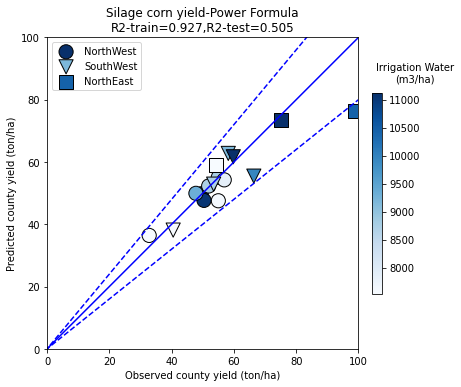

In [10]:
N=16
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x1 = df_county2[['growth_days']].to_numpy().ravel()
x2 = df_county2[['irrig_count']].to_numpy().ravel()
x3 = df_county2[['irrig_wat_m3ha']].to_numpy().ravel()
x4 = df_county2[['Ecwat']].to_numpy().ravel()
x5 = df_county2[['ETo_mm']].to_numpy().ravel()
x6 = df_county2[['elevation_m']].to_numpy().ravel()
x7 = df_county2[['Region_NW1SW2NE3']].to_numpy().ravel()
x=np.c_[x0,x1,x2,x3,x4,x5,x6,x7]
y = df_county2[["yield_tonha"]].to_numpy().ravel()

    #intercept   gday  irriN  irrigW  ecwat  eto     elev    
a0 =[ 1.014, -0.714,  0.113,  0.181, -0.017 , 0.18  , 0.116]

def func1(a,x): 
    x1=x[:,1]/110  #gdays
    x2=x[:,2]/25 #irrig count
    x3=x[:,3]/8000 #irrig_wat
    x4=0.5+x[:,4]/1.4  #ecwat
    x5=x[:,5]/700 #   ET_o
    x6=x[:,6]/1700 #elevation
    x7=x[:,7]   #region
    return 60*a[0]*x1**a[1]*x2**a[2]*x3**a[3]*x4**a[4]*x5**a[5]*x6**a[6]

func2= lambda a: np.dot(y[ind]-func1(a,x[ind]),y[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)



fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='SouthWest',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
ax.legend()
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water\n(m3/ha)', rotation=0,labelpad=-5, y=1.15,)
ax.plot(np.array([0,100]),np.array([0,100]), 'b-')
ax.plot(np.array([100,0,100]),np.array([120,0,80]), 'b--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=100)
ax.set_ylim(bottom=0,top=100)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Silage corn yield-Power Formula\nR2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\silage_corn_county_yield_Power Formula.png', dpi=300)


In [11]:
#here is the formula (markdown cell)
#draw with excel, add color for region (green, red, blue)
#add tag text for county name

$\frac{Yield}{60 ton/ha} = 
1.062       
\times {(\frac{GD}{110 days})}                ^{-1.395} 
\times {(\frac{Irrigation_{count}}{25 times})}^{0.274}
\times {(\frac{IrrigWat}{8000 m^{3}/ha})}     ^{0.136} 
\times {(\frac{ECwat}{1.4 dS/m})}             ^{-0.022}
\times {(\frac{ETo}{700 mm})}                 ^{0.646} 
\times {(\frac{Elevation}{1700 m})}           ^{0.055}$



[ 1.061 -1.082  0.235  0.136  0.05   0.206  0.015  0.     0.    -0.112]


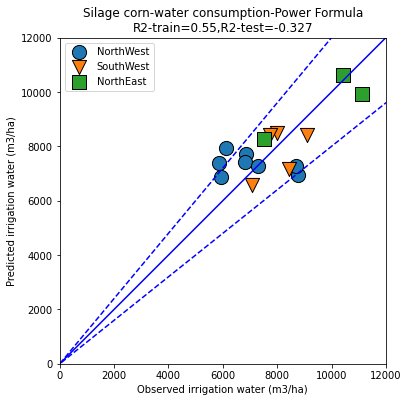

In [12]:
N=16
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x1 = df_county2[['growth_days']].to_numpy().ravel()
x2 = df_county2[['irrig_count']].to_numpy().ravel()
x3 = df_county2[['irrig_wat_m3ha']].to_numpy().ravel()
x4 = df_county2[['Ecwat']].to_numpy().ravel()
x5 = df_county2[['ETo_mm']].to_numpy().ravel()
x6 = df_county2[['elevation_m']].to_numpy().ravel()
x7 = df_county2[['Region_NW1SW2NE3']].to_numpy().ravel()
x8_long = df_county2[['longitude']].to_numpy().ravel()
x9_lat = df_county2[['latitude']].to_numpy().ravel()
x=np.c_[x0,x1,x2,x3,x4,x5,x6,x7,x8_long,x9_lat]
yy = x3

   #  intercept   gd/110   ir_N/25  wat/12000   ec_wat/1.4   et_o/700    elev/700                     42-lat
a0 = [ 0.686    ,-0.711,  0.173 ,    0.136     ,-0.038      , 0.43    ,  0.003    ,  0. ,    0. ,    0.102]


def func1(a,x): 
    x1=x[:,1]/110    #grow days
    x2=x[:,2]/25     #irrig count
    x3=x[:,3]/12000  #wat
    x4=x[:,4]/1.4    #ec wat
    x5=x[:,5]/700    #et_o
    x6=x[:,6]/1700   #elev
    x7=x[:,7]      #region
    x8=62-x[:,8]  #long
    x9=42-x[:,9]  #lat
    return 10000*a[0]*x1**a[1]*x2**a[2]*x4**a[4]*x5**a[5]*x6**a[6]*x9**a[9]

func2= lambda a: np.dot(yy[ind]-func1(a,x[ind]),yy[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
yy_hat_lin1=func1(a0,x)



fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)
m=ax.scatter(yy[x5_region==1], yy_hat_lin1[x5_region==1],marker='o',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(yy[x5_region==2], yy_hat_lin1[x5_region==2],marker='v',s=200,label='SouthWest',edgecolors='k')
m=ax.scatter(yy[x5_region==3], yy_hat_lin1[x5_region==3],marker='s',s=200,label='NorthEast',edgecolors='k')
ax.legend()
ax.plot(np.array([0,100000]),np.array([0,100000]), 'b-')
ax.plot(np.array([100000,0,100000]),np.array([120000,0,80000]), 'b--')
ax.set_xlabel('Observed irrigation water (m3/ha)')
ax.set_ylabel('Predicted irrigation water (m3/ha)')
ax.set_xlim(left=0,right=12000)
ax.set_ylim(bottom=0,top=12000)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(yy[ind],yy_hat_lin1[ind]),3)
R2_test=np.round(r2_score(yy[~ind],yy_hat_lin1[~ind]),3)
ax.set_title("Silage corn-water consumption-Power Formula\nR2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\silage_corn_county_wat_irrig-Power Formula.png', dpi=300)
